In [130]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.colors import ListedColormap
import os
import glob
import matplotlib.cm as cm

In [131]:
df = pd.read_csv('med_dataset_slimmed.csv')

In [132]:
df_cat = df.dtypes[df.dtypes == "object"].index.tolist()
df[df_cat].nunique()

name           222825
substitute0     19374
substitute1     16309
sideEffect0       326
sideEffect1       334
sideEffect2       351
sideEffect3       362
sideEffect4       358
use0              657
use1              334
use2              139
dtype: int64

In [133]:
med_counts = df["name"].value_counts()
med_counts

name
ns 0.9% infusion                     13
meditrax s 1000mg/500mg injection     8
modace 100mg/500mg tablet             6
mucohelp 1gm injection                6
matchfix-cv 200mg/125mg tablet        6
                                     ..
etoxiflam 120mg tablet                1
etocrax 90mg tablet                   1
edikacin 500mg injection              1
eurotam 0.40mg tablet                 1
zyvocol 1% dusting powder             1
Name: count, Length: 222825, dtype: int64

In [134]:
use_counts = df["use0"].value_counts()
use_counts

use0
Treatment of Bacterial infections                             39573
 Pain relief                                                  22783
Treatment of Type 2 diabetes mellitus                         11350
 Bacterial infections                                         11288
Treatment of Gastroesophageal reflux disease (Acid reflux)     9749
                                                              ...  
 Vision loss due to swelling of the macula                        1
Treatment of Thyroid cancer                                       1
Treatment of Cataract                                             1
Treatment of Invasive Aspergillosis                               1
 Severe acute pain                                                1
Name: count, Length: 657, dtype: int64

In [135]:
df_dup = df['name'].duplicated()

df_dup.value_counts()

name
False    222825
True      25393
Name: count, dtype: int64

In [136]:
df_dup = df[~df['name'].duplicated(keep=False)]

df_dup.head(10)

,id,name,substitute0,substitute1,sideEffect0,sideEffect1,sideEffect2,sideEffect3,sideEffect4,use0,use1,use2
0,1,augmentin 625 duo tablet,Penciclav 500 mg/125 mg Tablet,Moxikind-CV 625 Tablet,Vomiting,Nausea,Diarrhea,NaN,NaN,Treatment of Bacterial infections,NaN,NaN
1,2,azithral 500 tablet,Zithrocare 500mg Tablet,Azax 500 Tablet,Vomiting,Nausea,Abdominal pain,Diarrhea,NaN,Treatment of Bacterial infections,NaN,NaN
2,3,ascoril ls syrup,Solvin LS Syrup,Ambrodil-LX Syrup,Nausea,Vomiting,Diarrhea,Upset stomach,Stomach pain,Treatment of Cough with mucus,NaN,NaN
4,5,avil 25 tablet,Eralet 25mg Tablet,NaN,Sleepiness,Dryness in mouth,NaN,NaN,NaN,Treatment of Allergic conditions,NaN,NaN
5,6,allegra-m tablet,Emlukast-FX Tablet,LCFEX-Mont Tablet,Nausea,Diarrhea,Vomiting,Skin rash,Flu-like symptoms,Treatment of Sneezing and runny nose due to al...,NaN,NaN
6,7,amoxyclav 625 tablet,Penciclav 500 mg/125 mg Tablet,Moxikind-CV 625 Tablet,Vomiting,Nausea,Diarrhea,NaN,NaN,Treatment of Bacterial infections,NaN,NaN
8,9,atarax 25mg tablet,HD Zine 25mg Tablet,Hyzox 25 Tablet,Sedation,Nausea,Vomiting,Upset stomach,Constipation,Treatment of Anxiety,Treatment of Skin conditions with inflammation...,NaN
9,10,ascoril d plus syrup sugar free,Arnikof D Syrup,Cofsolve-D Syrup,Nausea,Vomiting,Loss of appetite,Headache,NaN,Treatment of Dry cough,NaN,NaN
10,11,aciloc 150 tablet,Zinemac 150 Tablet,Monoloc 150mg Tablet,Headache,Diarrhea,Gastrointestinal disturbance,NaN,NaN,Treatment of Gastroesophageal reflux disease (...,Treatment of Peptic ulcer disease,NaN
11,12,alex syrup,Alkof Junior Syrup,Respicure-D Syrup,Nausea,Vomiting,Loss of appetite,Headache,NaN,Treatment of Dry cough,NaN,NaN


In [137]:
df_final= df_dup.fillna('NA')

df_final.head()

,id,name,substitute0,substitute1,sideEffect0,sideEffect1,sideEffect2,sideEffect3,sideEffect4,use0,use1,use2
0,1,augmentin 625 duo tablet,Penciclav 500 mg/125 mg Tablet,Moxikind-CV 625 Tablet,Vomiting,Nausea,Diarrhea,NA,NA,Treatment of Bacterial infections,NA,NA
1,2,azithral 500 tablet,Zithrocare 500mg Tablet,Azax 500 Tablet,Vomiting,Nausea,Abdominal pain,Diarrhea,NA,Treatment of Bacterial infections,NA,NA
2,3,ascoril ls syrup,Solvin LS Syrup,Ambrodil-LX Syrup,Nausea,Vomiting,Diarrhea,Upset stomach,Stomach pain,Treatment of Cough with mucus,NA,NA
4,5,avil 25 tablet,Eralet 25mg Tablet,NA,Sleepiness,Dryness in mouth,NA,NA,NA,Treatment of Allergic conditions,NA,NA
5,6,allegra-m tablet,Emlukast-FX Tablet,LCFEX-Mont Tablet,Nausea,Diarrhea,Vomiting,Skin rash,Flu-like symptoms,Treatment of Sneezing and runny nose due to al...,NA,NA


In [138]:
#Exporting dataframe to csv
df_final.to_csv("med_dataset_cleaned.csv", index=False)

In [139]:
side_effects= df_final["sideEffect1"].value_counts()
side_eefects_df = side_effects.reset_index()

side_eefects_df.columns = ['Side Effects', 'Count']

side_eefects_df

,Side Effects,Count
0,Vomiting,35701
1,Nausea,22408
2,Diarrhea,15135
3,Headache,14806
4,Dizziness,12409
...,...,...
330,Iron deficiency,1
331,Injection site allergic reaction,1
332,Lung disorder,1
333,Stomatitis (Inflammation of the mouth),1


/var/folders/30/yg7n3vrj7tz78s275sqssmb80000gn/T/ipykernel_19056/883673913.py:1: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  colormap = cm.get_cmap('viridis')


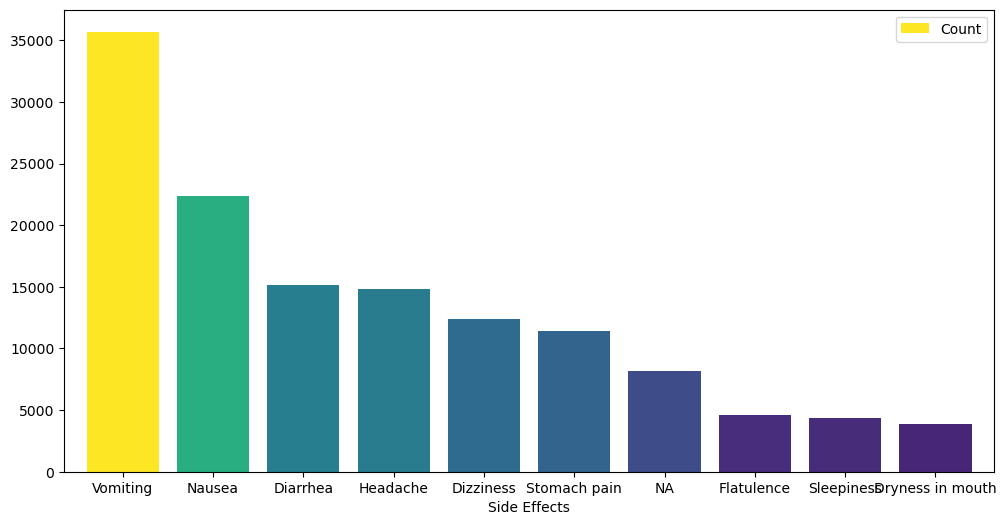

In [140]:

colormap = cm.get_cmap('viridis')

# Normalize the count values to the range [0, 1]
normalize = plt.Normalize(vmin=side_eefects_df['Count'].min(), vmax=side_eefects_df['Count'].max())

# Get a list of colors based on the normalized values
colors = [colormap(normalize(value)) for value in side_eefects_df['Count']]

# Plot the value counts DataFrame
ax = side_eefects_df.head(10).plot(kind='bar', x='Side Effects', y='Count', figsize=(12, 6),width=0.8,color=colors)

# Rotate the x-axis labels for better readability
plt.xticks(rotation=0)

# Display the plot
plt.show()

In [141]:
use_counts_2 = df_final["use0"].value_counts()
use_counts_df=use_counts_2.reset_index()
use_counts_df.columns = ['Use Category', 'Count']
use_counts_df


,Use Category,Count
0,Treatment of Bacterial infections,29597
1,Pain relief,18475
2,Treatment of Type 2 diabetes mellitus,8904
3,Bacterial infections,8192
4,Treatment of Gastroesophageal reflux disease (...,8174
...,...,...
646,Melanoma,1
647,Wilson's disease,1
648,Polycythemia vera,1
649,Treatment of Male infertility,1


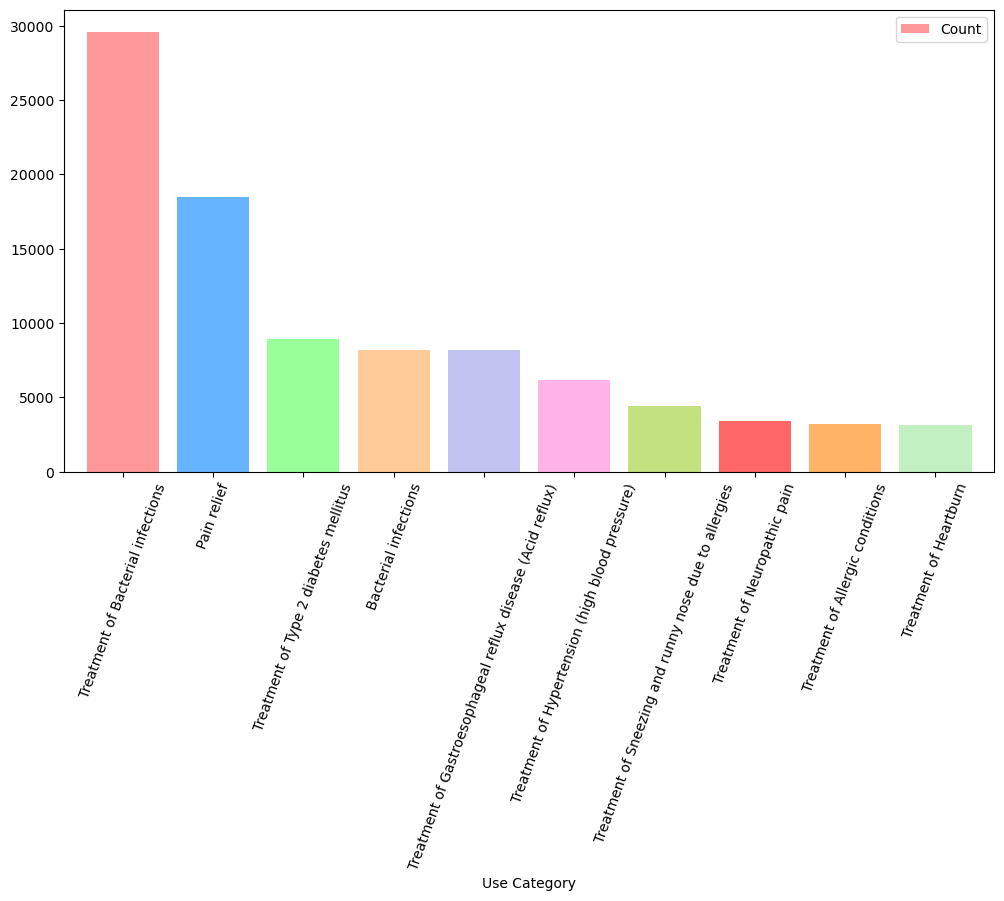

In [142]:
colors = ['#ff9999','#66b3ff','#99ff99','#ffcc99','#c2c2f0','#ffb3e6','#c4e17f','#ff6666','#ffb366','#c2f0c2']

# Colors list matches the number of bars
colors = colors[:len(use_counts_df)]

# Plot the value counts DataFrame
ax = use_counts_df.head(10).plot(kind='bar', x='Use Category', y='Count', figsize=(12, 6),width=0.8,color=colors)

# Rotate the x-axis labels for better readability
plt.xticks(rotation=70)

# Display the plot
plt.show()